# Neutron Source Analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import os
plt.style.use('seaborn')

C:\Users\JA_LT\AppData\Local\Temp\ipykernel_14108\4047375326.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
print(os.getcwd())
print(os.listdir("../neutron_source"))

d:\PostDocs_Trabajo\Curso_Introduccion_Fisica_Nuclear\Conferencias\curso_IFN_analisis_datos\neutron_source
['co60.csv', 'cs137.csv', 'Data.csv', 'Datanesutron_source_spectra_without_bkg.csv', 'fondo15min.csv', 'fondo28h.csv', 'fuente_neutrones.csv', 'lokol.csv', 'na22.csv', 'neutrones15min.csv', 'neutron_source.ipynb']


## __Steps for Analysis__
+ Load data from gamma sources for calibration purposes
+ Get the energy calibration function
+ Apply the calibration function to Na22 source

### import data 

In [4]:
df_co60 = pd.read_csv('co60.csv')
df_cs137 = pd.read_csv('cs137.csv')

### Making Cs-137 source plots

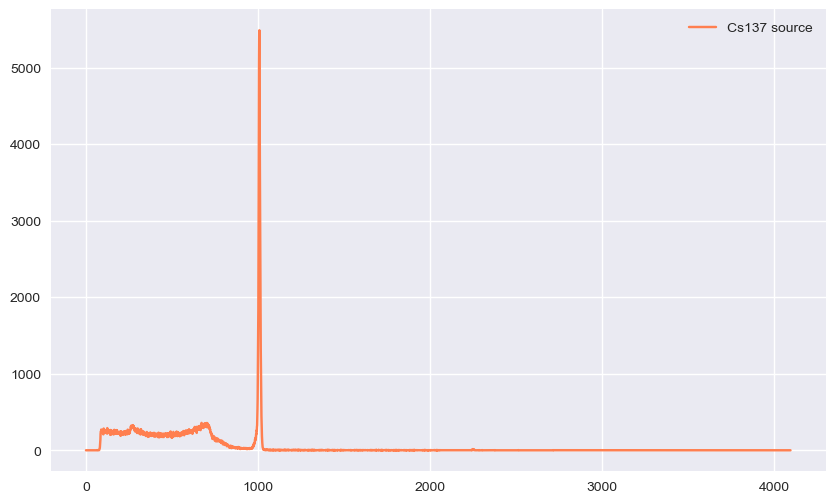

In [5]:
x_stuff_cs137 = df_cs137.Channel
y_stuff_cs137 = df_cs137.Counts

plt.subplots(figsize=(10, 6))
plt.plot(x_stuff_cs137, y_stuff_cs137, color='coral', label=r'Cs137 source')
plt.legend()
plt.show()

We are interested on the huge peaks that belongs to a gamma energy spectra emitted from the Cesium 137 source (common radioactive substance)

We fit the peak using a Gaussian curve
$$ G(x,A,\mu,\sigma) = Ae^{-(x-\mu)^{2} / \sigma^{2}} $$

In [6]:
def gauss_f(x,A,mu,sig):
    return A * np.exp(-(x-mu) ** 2 / sig ** 2)

Getting the region of the data we are interested to fit

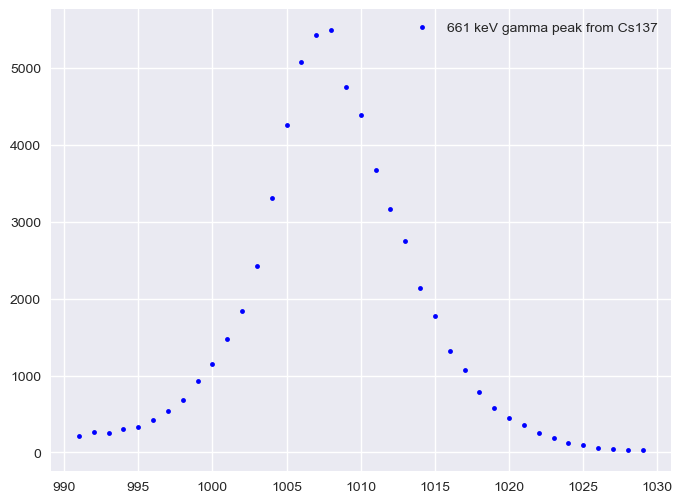

In [7]:
x_cs137 = x_stuff_cs137[(x_stuff_cs137>990) & (x_stuff_cs137<1030)]
y_cs137 = y_stuff_cs137[(x_stuff_cs137>990) & (x_stuff_cs137<1030)]
plt.subplots(figsize=(8, 6))
plt.plot(x_cs137, y_cs137,'b.',label=r'661 keV gamma peak from Cs137')
plt.legend()
plt.show()

In [8]:
popt, pcov = curve_fit(gauss_f, x_cs137, y_cs137, p0 = [5500, 1005, 15])
popt

array([5064.91286375, 1007.96438543,    6.58768471])

In [9]:
amp_cs137, mu_cs137, sig_cs137= popt
x_model_cs137 = np.linspace(min(x_cs137), max(x_cs137),1000)
y_model_cs137 = gauss_f(x_model_cs137,*popt)

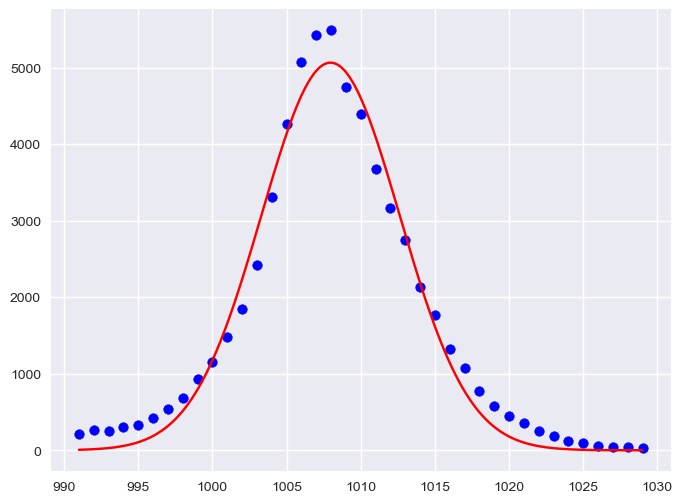

In [10]:
plt.subplots(figsize=(8, 6))
plt.scatter(x_cs137, y_cs137, color='blue')
plt.plot(x_model_cs137, y_model_cs137, color='r')
plt.show()

The parameters error is given by the square root of the diagonal of the covariance matrix

In [11]:
error_cs137 = np.sqrt(np.diag(pcov))
print(popt)
print(np.sqrt(np.diag(pcov)))
print("-> The values of Amplitude A = ", round( popt[0], 2), "+-" ,round( error_cs137[0], 2 ))
print("-> The values of mu  = ", round( popt[1], 2), "+-" ,round( error_cs137[1], 2 ))
print("-> The values of sig = ", round( popt[2], 2), "+-" ,round( error_cs137[2], 2 ))

[5064.91286375 1007.96438543    6.58768471]
[108.47748213   0.11519837   0.1629168 ]
-> The values of Amplitude A =  5064.91 +- 108.48
-> The values of mu  =  1007.96 +- 0.12
-> The values of sig =  6.59 +- 0.16


### Analysis of the Cobalt-60 radiactive source

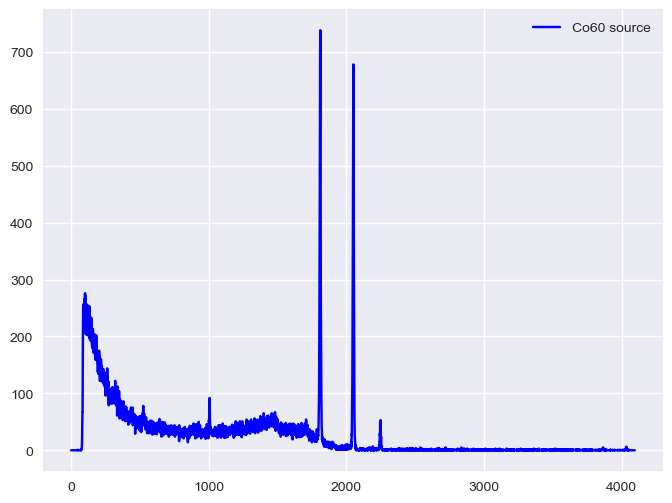

In [12]:
x_stuff_co60 = df_co60.Channel
y_stuff_co60 = df_co60.Counts

plt.subplots(figsize=(8, 6))
plt.plot(x_stuff_co60, y_stuff_co60, color='blue', label='Co60 source')
plt.legend()
plt.show()

### Selecting the interest region

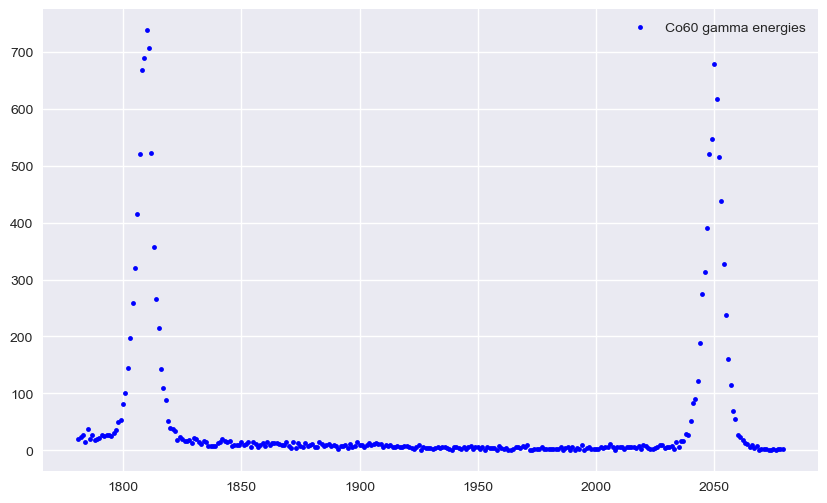

In [13]:
x_co60 = x_stuff_co60[(x_stuff_co60>1780) & (x_stuff_co60<2080)]
y_co60 = y_stuff_co60[(x_stuff_co60>1780) & (x_stuff_co60<2080)]

plt.subplots(figsize=(10, 6))
plt.plot(x_co60, y_co60, 'b.', label='Co60 gamma energies')
plt.legend()
plt.show()

### Defining 2 gauss function for fit two peaks at the same time

In [14]:
def gauss_f(x,A,mu1,sig1,B, mu2, sig2):
    return A * np.exp(-(x-mu1) ** 2 / sig1 ** 2) + B * np.exp(-(x-mu2) ** 2 / sig2 ** 2)

In [15]:
popt, pcov = curve_fit(gauss_f, x_co60, y_co60, p0 = [700, 1850, 15, 650, 2040,15])
popt

array([ 693.23766983, 1809.32936774,    5.28892152,  603.69404417,
       2050.00984596,    5.37802705])

In [16]:
amp1_co60, mu1_co60, sig1_co60, amp2_co60, mu2_co60, sig2_co60 = popt
x_model_co60 = np.linspace(min(x_co60), max(x_co60),1000)
y_model_co60 = gauss_f(x_model_co60,*popt)

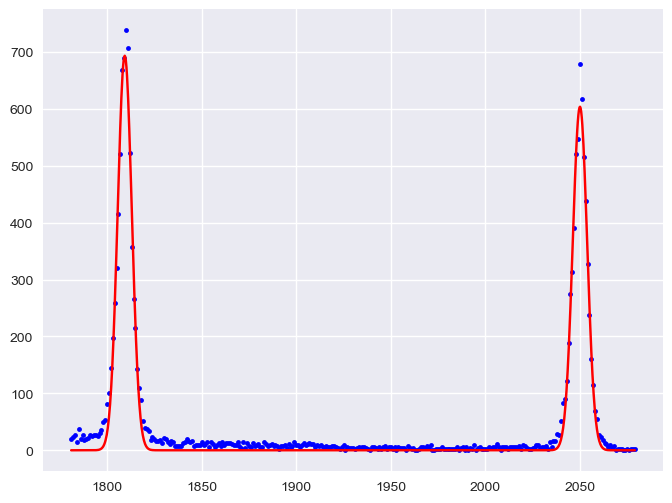

In [17]:
plt.subplots(figsize=(8, 6))
plt.plot(x_co60, y_co60,'b.')
plt.plot(x_model_co60, y_model_co60, color='r')
plt.show()

### Printing the fitting error

In [18]:
error_co60 = np.sqrt(np.diag(pcov))
print(popt)
print(error_co60)
print("-> The values of Amplitude A = ", round( popt[0], 2), "+-" ,round( error_co60[0], 2 ))
print("-> The values of mu1  = ", round( popt[1], 2), "+-" ,round( error_co60[1], 2 ))
print("-> The values of sig1 = ", round( popt[2], 2), "+-" ,round( error_co60[2], 2 ))
print("-> The values of Amplitude B = ", round( popt[3], 2), "+-" ,round( error_co60[3], 2 ))
print("-> The values of mu2  = ", round( popt[4], 2), "+-" ,round( error_co60[4], 2 ))
print("-> The values of sig2 = ", round( popt[5], 2), "+-" ,round( error_co60[5], 2 ))

[ 693.23766983 1809.32936774    5.28892152  603.69404417 2050.00984596
    5.37802705]
[8.16690576 0.05087347 0.07194596 8.09893255 0.0589099  0.08331117]
-> The values of Amplitude A =  693.24 +- 8.17
-> The values of mu1  =  1809.33 +- 0.05
-> The values of sig1 =  5.29 +- 0.07
-> The values of Amplitude B =  603.69 +- 8.1
-> The values of mu2  =  2050.01 +- 0.06
-> The values of sig2 =  5.38 +- 0.08


### Getting the calibration curve knowing the gamma energies from Cobalt-60 and Cesium-137
$\gamma$(Cs-137) = 661.66 keV, $\gamma_{1}$(Co-60) = 1137.2 keV, $\gamma_{2}$(Co-60) = 1332.5 keV

In [19]:
print(f"Mean Channels:{mu_cs137.round(2), mu1_co60.round(2), mu2_co60.round(2)}")

Mean Channels:(1007.96, 1809.33, 2050.01)


In [20]:
channel_train = np.array([mu_cs137, mu1_co60, mu2_co60]).reshape(-1,1)
energy_train = np.array([661.66, 1137.2, 1332.5 ]).reshape(-1,1)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Model
model = LinearRegression()
type(model)
model.fit(channel_train, energy_train)

# Print parameters
r_sq = r2_score(energy_train, channel_train * 0.63110283 + 19.86363862)
print(f"intercepto (n): {model.intercept_}")
print(f"pendiente (m): {model.coef_}")
print(f"R-squared (m): {r_sq}")

intercepto (n): [19.86363862]
pendiente (m): [[0.63110283]]
R-squared (m): 0.995841239395303


In [23]:
df_na22 = pd.read_csv('na22.csv')

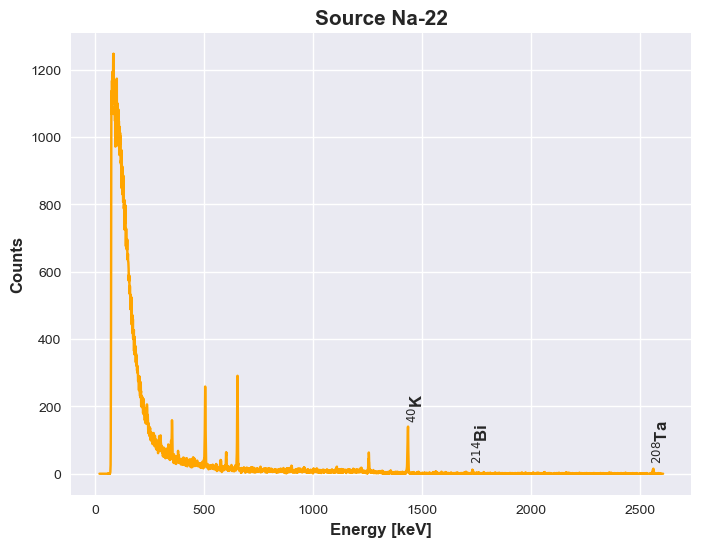

In [24]:
df_na22['Energy'] = df_na22['Channel'] * 0.63110283 + 19.86363862
x_stuff_na22 = df_na22['Energy']
y_stuff_na22 = df_na22.Counts

fig, ax = plt.subplots(1,1,figsize=(8, 6))

ax.plot(x_stuff_na22, y_stuff_na22, color="orange")
ax.set_xlabel('Energy [keV]',family='sans-serif', size=12, fontweight='bold')
ax.set_ylabel('Counts',family='sans-serif', size=12, fontweight='bold')
ax.set_title(r'Source Na-22',size=15, fontweight='bold')

ax.annotate(r'$^{40}$K', xy=(1425, 160), fontweight='bold',size = 12 , rotation = 90)
ax.annotate(r'$^{208}$Ta', xy=(2545, 40), fontweight='bold', size = 12, rotation = 90)
ax.annotate(r'$^{214}$Bi', xy=(1720, 40), fontweight='bold', size = 12, rotation = 90)

plt.show()

In [25]:
df_neutron_source15 = pd.read_csv('neutrones15min.csv')
df_background15min = pd.read_csv('fondo15min.csv')

df_neutron_clean = pd.DataFrame()
df_neutron_clean['Channel'] = df_neutron_source15['Channel']
df_neutron_clean['Counts_neutron'] = df_neutron_source15['Counts']
df_neutron_clean['Counts_bkg'] = df_background15min['Counts']
df_neutron_clean['Counts'] = df_neutron_clean['Counts_neutron'] - df_neutron_clean['Counts_bkg']
df_neutron_clean.min()

Channel            0
Counts_neutron     0
Counts_bkg         0
Counts           -43
dtype: int64

** Aqui encontramos que hay un canal negativo en la resta del fondo en el pico del 40K, lo que significa que el espectro de fondo se midió __más tiempo__  

Text(0.5, 1.0, 'Source $^{241}Am-^{9}Be$ Neutron Source')

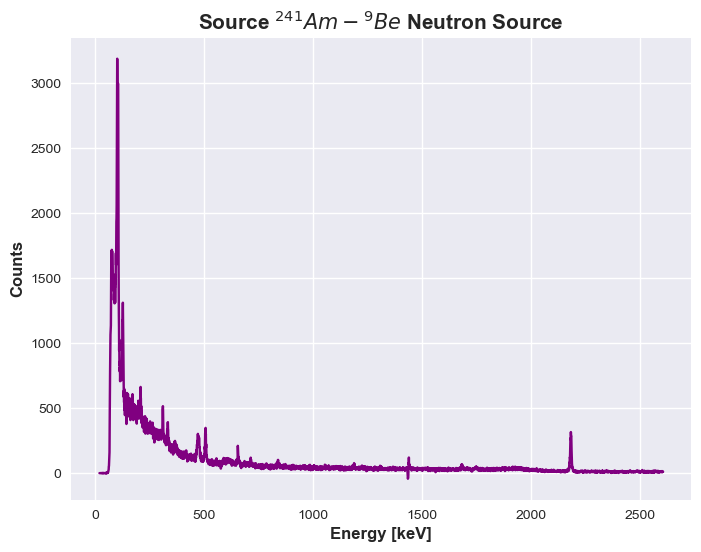

In [27]:
df_neutron_clean['Energy'] = df_neutron_clean['Channel'] * 0.63110283 + 19.86363862
x_stuff_neutron = df_neutron_clean['Energy']
y_stuff_neutron = df_neutron_clean['Counts']

df_neutron_clean.to_csv('Data_neutron_source_spectra_without_bkg.csv')

fig, ax = plt.subplots(1,1,figsize=(8, 6))

ax.plot(x_stuff_neutron, y_stuff_neutron, color="purple")
ax.set_xlabel('Energy [keV]',family='sans-serif', size=12, fontweight='bold')
ax.set_ylabel('Counts',family='sans-serif', size=12, fontweight='bold')
ax.set_title(r'Source $^{241}Am-^{9}Be$ Neutron Source',size=15, fontweight='bold')

#ax.annotate(r'$^{40}K$', xy=(1425, 160), fontweight='bold',size = 12 , rotation = 90)
#ax.annotate(r'$^{208}Ta$', xy=(2545, 70), fontweight='bold', size = 12, rotation = 90)

#plt.show()
